### Denetimsiz/Gözetimsiz Öğrenme (Unsupervised Learning)

In [58]:
# pip install yellowbrick

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Kmeans 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram # hiyerarşik kümeleme yöntemi
from sklearn.decomposition import PCA # temel bilesen yöntemi

In [60]:
df = pd.read_csv("USArrests.csv",index_col=0) # ilk sutun indeksi temsil eder bu yüzden ilk satırı indeks kolonu yaptık
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [61]:
df.isnull().any()

Murder      False
Assault     False
UrbanPop    False
Rape        False
dtype: bool

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [64]:
# uzaklık temelli ve gradient descent temelli yöntemlerin kullanımındaki 
# süreçlerde değişkenleri standartlaştırılması önemlidir. KMeans de bunlardan biri.

mms = MinMaxScaler((0,1))
df = mms.fit_transform(df) # dataframe fit_transform edildiğinde artık nump array'e dönüşür
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

### Hiyerarşik Kümeleme Analizi (Hierarchical Cluster Analysis)

In [65]:
df = pd.read_csv("USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [66]:
mms = MinMaxScaler((0,1))
df = mms.fit_transform(df) 
# uzaklık temelli ya da gd temelli algoritmalarda standartlaştırma sart

In [67]:
hc_average = linkage(df,"average") 
# oklid uzaklığına göre gözlem birimlerini kümelere ayırır
# bütün gözlem birimlerini tek basına gibi değerlendirip, 
# daha sonra iteratif olarak  en benzer olanlarla, birleştirici, kümeleme yapar

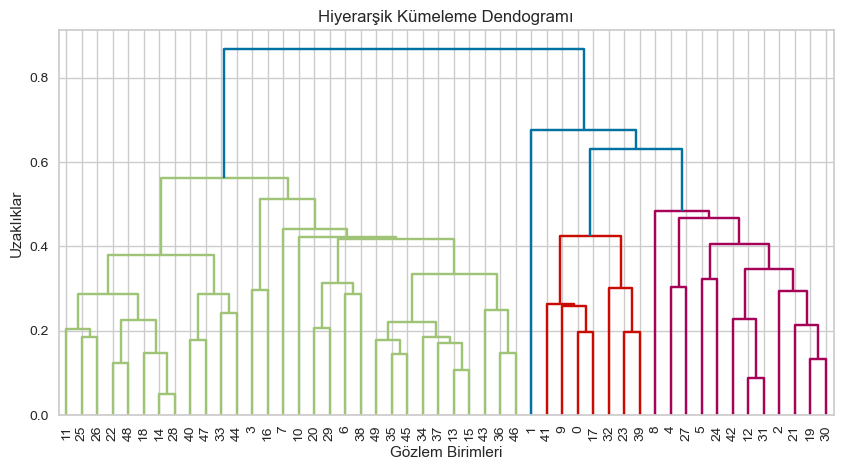

In [68]:
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10) # en asagıdakilerin boyutu
plt.show()

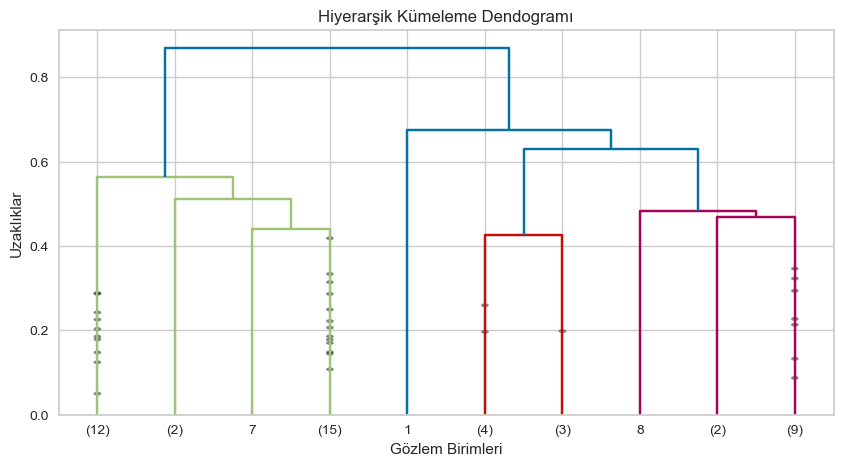

In [69]:
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp", 
           p=10, # 10 küme yap dedik
           show_contracted=True,
           leaf_font_size=10) # en asagıdakilerin boyutu
plt.show()

#### Küme Sayısı Belirleme

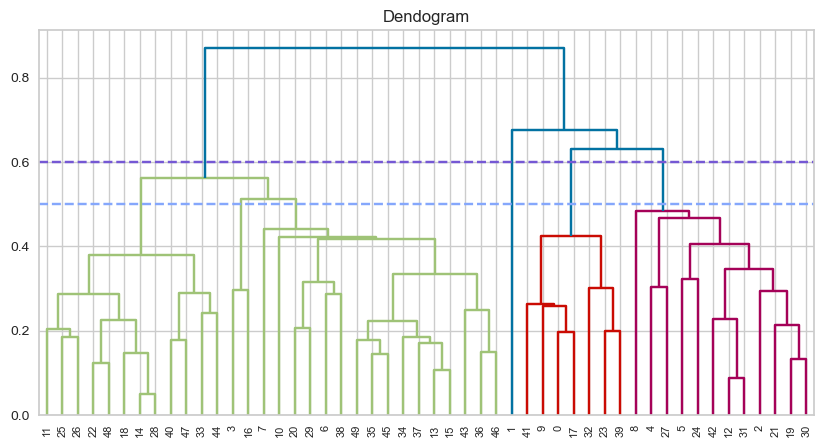

In [70]:
plt.figure(figsize=(10,5))
plt.title("Dendogram")
dend = dendrogram(hc_average)
#            truncate_mode="lastp", 
#            p=10,
#            show_contracted=True,
#            leaf_font_size=10)
plt.axhline(y=0.6, color="#7558d4",linestyle="--")
plt.axhline(y=0.5, color="#85a7fc",linestyle="--")
plt.show()

#### Final Hiyerarşik Kümeleme

In [71]:
from sklearn.cluster import AgglomerativeClustering # Birleştirici

In [72]:
cluster = AgglomerativeClustering(n_clusters=5,linkage="average") 
# en yaygın linkage yöntemleri ward ve average. complete de biraz.
# default olarak oklid uzaklığı ile hesaplanır

In [73]:
clusters = cluster.fit_predict(df)

In [74]:
df = pd.read_csv("USArrests.csv",index_col=0)

In [75]:
df["hi_clusters"] = clusters

In [76]:
df["hi_clusters"] = df["hi_clusters"] + 1

In [77]:
df["kmeans_clusters"] = clusters

In [78]:
df["kmeans_clusters"] = df["kmeans_clusters"] + 1

In [79]:
df.groupby("hi_clusters").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
             count       mean median   count        mean median    count   
hi_clusters                                                                
1               18   6.055556   6.15      18  140.055556  147.0       18   
2               12  10.883333  11.20      12  256.916667  254.5       12   
3                1  10.000000  10.00       1  263.000000  263.0        1   
4                7  14.671429  14.40       7  251.285714  249.0        7   
5               12   3.091667   2.60      12   76.000000   76.5       12   

                               Rape                   kmeans_clusters       \
                  mean median count       mean median           count mean   
hi_clusters                                                                  
1            71.333333   72.0    18  18.683333  19.15              18  1.0   
2            78.333333   80.0    12  32.250000  31.45              12  2.0   
3            48.000000   48.0     1  44.500000  44.50               1  3.0   
4            54.285714   58.0     7  21.685714  22.20               7  4.0   
5            52.083333   53.5    12  11.833333  11.25              12  5.0   

                    
            median  
hi_clusters         
1              1.0  
2              2.0  
3              3.0  
4              4.0  
5              5.0

In [80]:
df.groupby("kmeans_clusters").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
                 count       mean median   count        mean median    count   
kmeans_clusters                                                                
1                   18   6.055556   6.15      18  140.055556  147.0       18   
2                   12  10.883333  11.20      12  256.916667  254.5       12   
3                    1  10.000000  10.00       1  263.000000  263.0        1   
4                    7  14.671429  14.40       7  251.285714  249.0        7   
5                   12   3.091667   2.60      12   76.000000   76.5       12   

                                   Rape                   hi_clusters       \
                      mean median count       mean median       count mean   
kmeans_clusters                                                              
1                71.333333   72.0    18  18.683333  19.15          18  1.0   
2                78.333333   80.0    12  32.250000  31.45          12  2.0   
3                48.000000   48.0     1  44.500000  44.50           1  3.0   
4                54.285714   58.0     7  21.685714  22.20           7  4.0   
5                52.083333   53.5    12  11.833333  11.25          12  5.0   

                        
                median  
kmeans_clusters         
1                  1.0  
2                  2.0  
3                  3.0  
4                  4.0  
5                  5.0

In [81]:
df[(df.kmeans_clusters==1) | (df.hi_clusters==1)]

,Murder,Assault,UrbanPop,Rape,hi_clusters,kmeans_clusters
Arkansas,8.8,190,50,19.5,1,1
Connecticut,3.3,110,77,11.1,1,1
Delaware,5.9,238,72,15.8,1,1
Hawaii,5.3,46,83,20.2,1,1
Indiana,7.2,113,65,21.0,1,1
Kansas,6.0,115,66,18.0,1,1
Kentucky,9.7,109,52,16.3,1,1
Massachusetts,4.4,149,85,16.3,1,1
New Jersey,7.4,159,89,18.8,1,1
Ohio,7.3,120,75,21.4,1,1


In [82]:
df[(df.kmeans_clusters==2) | (df.hi_clusters==2)]

,Murder,Assault,UrbanPop,Rape,hi_clusters,kmeans_clusters
Arizona,8.1,294,80,31.0,2,2
California,9.0,276,91,40.6,2,2
Colorado,7.9,204,78,38.7,2,2
Florida,15.4,335,80,31.9,2,2
Illinois,10.4,249,83,24.0,2,2
Maryland,11.3,300,67,27.8,2,2
Michigan,12.1,255,74,35.1,2,2
Missouri,9.0,178,70,28.2,2,2
Nevada,12.2,252,81,46.0,2,2
New Mexico,11.4,285,70,32.1,2,2


In [83]:
df[(df.kmeans_clusters==3) | (df.hi_clusters==3)]

,Murder,Assault,UrbanPop,Rape,hi_clusters,kmeans_clusters
Alaska,10.0,263,48,44.5,3,3


In [84]:
df[(df.kmeans_clusters==4) | (df.hi_clusters==4)]

,Murder,Assault,UrbanPop,Rape,hi_clusters,kmeans_clusters
Alabama,13.2,236,58,21.2,4,4
Georgia,17.4,211,60,25.8,4,4
Louisiana,15.4,249,66,22.2,4,4
Mississippi,16.1,259,44,17.1,4,4
North Carolina,13.0,337,45,16.1,4,4
South Carolina,14.4,279,48,22.5,4,4
Tennessee,13.2,188,59,26.9,4,4


In [85]:
df[(df.kmeans_clusters==5) | (df.hi_clusters==5)]

,Murder,Assault,UrbanPop,Rape,hi_clusters,kmeans_clusters
Idaho,2.6,120,54,14.2,5,5
Iowa,2.2,56,57,11.3,5,5
Maine,2.1,83,51,7.8,5,5
Minnesota,2.7,72,66,14.9,5,5
Montana,6.0,109,53,16.4,5,5
Nebraska,4.3,102,62,16.5,5,5
New Hampshire,2.1,57,56,9.5,5,5
North Dakota,0.8,45,44,7.3,5,5
South Dakota,3.8,86,45,12.8,5,5
Vermont,2.2,48,32,11.2,5,5
